In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
#import clean dataset
data = pd.read_csv('D://10Academy Train//Week1//DATA//Task1.csv')
data.head(3)

,Bearer Id,Dur. (ms),MSISDN/Number,HTTP DL (Bytes),HTTP UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,1823652.0,3.366496e+10,NaN,NaN,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,1365104.0,3.368185e+10,NaN,NaN,1926113.0,7165.0,3493924.0,920172.0,629046.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,1361762.0,3.376063e+10,NaN,NaN,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


In [9]:
#aggregate number of XDR sessions
data_group=data.groupby(['MSISDN/Number']).agg({'Bearer Id':'count'}).reset_index().sort_values(by='Bearer Id')\
                                .rename(columns={'Bearer Id':'Number of xDR sessions'})
data_group
data_group.to_csv('D:/10Academy Train/Week1/DATA/Task1_No.of xDR sessions.csv', index=False)

In [10]:
#aggreagate session duration, total DL and UL and Total Bytes
def obtain_sum_total(df, column_names):
    sum_total = df.groupby(column_names).sum()
    return sum_total    
data_sum = obtain_sum_total(data, ['MSISDN/Number','Bearer Id'])
data_sum.to_csv('D:/10Academy Train/Week1/DATA/Task1_totalduration.csv',index=False)

In [11]:
data_sum.describe()

,Dur. (ms),HTTP DL (Bytes),HTTP UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,147028.000000,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05,1.470280e+05
mean,1.061404e+05,5.322425e+07,1.498468e+06,1.813190e+06,33253.035007,5.809590e+06,2.076963e+06,1.809797e+06,4.721021e+05,1.175082e+07,1.111923e+07,1.174412e+07,1.111250e+07,4.263070e+08,8.372931e+06,4.253861e+08,8.345746e+06,4.153273e+07,4.592345e+08
std,9.158682e+04,6.655827e+08,1.362413e+07,1.074713e+06,19700.407509,3.434277e+06,1.232244e+06,1.073007e+06,2.801749e+05,6.953894e+06,6.559621e+06,6.960843e+06,6.580161e+06,2.526203e+08,4.942916e+06,2.516071e+08,4.939721e+06,1.274668e+07,2.539864e+08
min,7.142000e+03,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000e+00,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,5.833400e+04,0.000000e+00,0.000000e+00,9.043430e+05,16532.000000,2.902564e+06,1.031521e+06,8.982768e+05,2.348310e+05,5.863920e+06,5.560914e+06,5.813578e+06,5.512114e+06,2.120815e+08,4.164863e+06,2.116837e+08,4.171354e+06,3.328640e+07,2.446731e+08
50%,8.639900e+04,0.000000e+00,0.000000e+00,1.802802e+06,33101.500000,5.799160e+06,2.065417e+06,1.803864e+06,4.686085e+05,1.168343e+07,1.107899e+07,1.171126e+07,1.106988e+07,4.259874e+08,8.341428e+06,4.242306e+08,8.311455e+06,4.125154e+07,4.583512e+08
75%,1.329998e+05,1.146771e+06,1.517590e+05,2.708800e+06,49587.500000,8.665474e+06,3.102922e+06,2.702198e+06,7.041785e+05,1.753174e+07,1.659915e+07,1.756587e+07,1.658973e+07,6.366657e+08,1.249695e+07,6.350551e+08,1.243770e+07,4.923846e+07,6.692333e+08
max,5.659733e+06,7.253064e+10,1.491890e+09,2.140952e+07,381924.000000,5.614408e+07,1.955117e+07,1.736216e+07,5.363196e+06,1.173038e+08,1.227704e+08,1.206419e+08,1.149237e+08,5.085494e+09,9.477161e+07,4.400231e+09,9.507130e+07,4.128648e+08,5.396236e+09


In [12]:
#create a new dataframe for the totals
Total_data=pd.DataFrame()

In [31]:
#Total_data['MSISDN/Number']=data['MSISDN/Number']
Total_data['Dur. (ms)'] = data_sum['Dur. (ms)']
Total_data['HTTP (Bytes)'] = data_sum['HTTP DL (Bytes)'] + data_sum['HTTP UL (Bytes)']
Total_data['Social Media (Bytes)'] = data_sum.iloc[:,3] +data_sum.iloc[:,4]
Total_data['Google (Bytes)'] = data_sum.iloc[:,5] + data_sum.iloc[:,6]
Total_data['Email (Bytes)'] = data_sum.iloc[:,7] + data_sum.iloc[:,8]
Total_data['Youtube (Bytes)'] = data_sum.iloc[:,9] + data_sum.iloc[:,10]
Total_data['Netflix (Bytes)'] = data_sum.iloc[:,11] + data_sum.iloc[:,12]
Total_data['Gaming (Bytes)'] = data_sum.iloc[:,13] + data_sum.iloc[:,14]
Total_data['Other (Bytes)'] = data_sum.iloc[:,15] + data_sum.iloc[:,16]
Total_data['Total (Bytes)'] = data_sum.iloc[:,17] + data_sum.iloc[:,18]
Total_data.head(5)

Dur. (ms)  HTTP (Bytes)  Social Media (Bytes)  \
MSISDN/Number Bearer Id                                                     
3.360100e+10  1.311448e+19   116720.0           0.0             2232135.0   
              7.349883e+18   181230.0           0.0             2660565.0   
              7.349883e+18   134969.0           0.0             3195623.0   
3.360101e+10  1.304243e+19    49878.0        9402.0              280294.0   
              7.277826e+18    18555.0   189941916.0             1524057.0   

                            Google (Bytes)  Email (Bytes)  Youtube (Bytes)  \
MSISDN/Number Bearer Id                                                      
3.360100e+10  1.311448e+19       4389005.0      1331362.0       21624548.0   
              7.349883e+18       5334863.0      3307781.0       12432223.0   
              7.349883e+18       3443126.0      3205380.0       21333570.0   
3.360101e+10  1.304243e+19       9678493.0      2284670.0        6977321.0   
              7.277826e+18      10170635.0      1413685.0       20492482.0   

                            Netflix (Bytes)  Gaming (Bytes)  Other (Bytes)  \
MSISDN/Number Bearer Id                                                      
3.360100e+10  1.311448e+19       27180981.0     812458661.0    386570872.0   
              7.349883e+18       11221763.0     119750078.0    281710071.0   
              7.349883e+18       19353900.0     538827713.0    501693672.0   
3.360101e+10  1.304243e+19        1942092.0     391126127.0     35279702.0   
              7.277826e+18       21973110.0     802565189.0     85988660.0   

                            Total (Bytes)  MSISDN/Number  
MSISDN/Number Bearer Id                                   
3.360100e+10  1.311448e+19    878690574.0            NaN  
              7.349883e+18    156859643.0            NaN  
              7.349883e+18    595966483.0            NaN  
3.360101e+10  1.304243e+19    422320698.0            NaN  
              7.277826e+18    871832580.0            NaN

In [37]:
Total_data1=Total_data.drop(['MSISDN/Number'], axis=1)
Total_data1.columns.to_list()
#Total_data.head()

['Dur. (ms)',
 'HTTP (Bytes)',
 'Social Media (Bytes)',
 'Google (Bytes)',
 'Email (Bytes)',
 'Youtube (Bytes)',
 'Netflix (Bytes)',
 'Gaming (Bytes)',
 'Other (Bytes)',
 'Total (Bytes)']

In [17]:
#find total bytes for each application
Total_data_plot_scatter(Total_data, x_col="Total (Bytes)", y_col="Social Media (Bytes)", hue='hue', style='style',\
             title="Social Media (Bytes) vs Total (Megabytes)")

NameError: name 'Total_data_plot_scatter' is not defined

In [27]:
sns.set(rc={'figure.figsize':(15,14)})
sns.barplot(
    data=Total_data.head(25),
    x='MSISDN/Number', y='Total (Bytes)',color='darkblue'
)

sns.barplot(
    data=Total_data.head(25),
    x='MSISDN/Number', y='Youtube (Bytes)',color='lightblue'
)
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Total Data')
bottom_bar = mpatches.Patch(color='lightblue', label='Youtube (Bytes) Data')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Amount of Total Data Spent on Youtube (Bytes)', size=20)
plt.xticks(rotation=90, fontsize=12)

ValueError: min() arg is an empty sequence

In [19]:
Total_data

Dur. (ms)  HTTP (Bytes)  Social Media (Bytes)  \
MSISDN/Number Bearer Id                                                     
3.360100e+10  1.311448e+19   116720.0           0.0             2232135.0   
              7.349883e+18   181230.0           0.0             2660565.0   
              7.349883e+18   134969.0           0.0             3195623.0   
3.360101e+10  1.304243e+19    49878.0        9402.0              280294.0   
              7.277826e+18    18555.0   189941916.0             1524057.0   
...                               ...           ...                   ...   
3.379000e+10  1.304243e+19     8810.0      729539.0              300183.0   
              1.311448e+19   140988.0           0.0              498569.0   
3.197021e+12  7.277826e+18   877385.0           0.0              715224.0   
3.370000e+14  7.349883e+18   253030.0           0.0              521566.0   
8.823971e+14  7.277826e+18   869844.0           0.0             1546088.0   

                            Google (Bytes)  Email (Bytes)  Youtube (Bytes)  \
MSISDN/Number Bearer Id                                                      
3.360100e+10  1.311448e+19       4389005.0      1331362.0       21624548.0   
              7.349883e+18       5334863.0      3307781.0       12432223.0   
              7.349883e+18       3443126.0      3205380.0       21333570.0   
3.360101e+10  1.304243e+19       9678493.0      2284670.0        6977321.0   
              7.277826e+18      10170635.0      1413685.0       20492482.0   
...                                    ...            ...              ...   
3.379000e+10  1.304243e+19       7531269.0      1006915.0       26647843.0   
              1.311448e+19       5429705.0      2514097.0       19851572.0   
3.197021e+12  7.277826e+18      10438660.0      1520771.0       11959905.0   
3.370000e+14  7.349883e+18       9830617.0      3318582.0       36734940.0   
8.823971e+14  7.277826e+18       9218647.0      3330974.0       40940710.0   

                            Netflix (Bytes)  Gaming (Bytes)  Other (Bytes)  \
MSISDN/Number Bearer Id                                                      
3.360100e+10  1.311448e+19       27180981.0     812458661.0    386570872.0   
              7.349883e+18       11221763.0     119750078.0    281710071.0   
              7.349883e+18       19353900.0     538827713.0    501693672.0   
3.360101e+10  1.304243e+19        1942092.0     391126127.0     35279702.0   
              7.277826e+18       21973110.0     802565189.0     85988660.0   
...                                     ...             ...            ...   
3.379000e+10  1.304243e+19       14902538.0     660361359.0    295282817.0   
              1.311448e+19        8531060.0     437003292.0    211115113.0   
3.197021e+12  7.277826e+18       26592300.0     178048738.0    470526473.0   
3.370000e+14  7.349883e+18       30905042.0     510142695.0    149188439.0   
8.823971e+14  7.277826e+18       28846230.0      43070260.0    401360457.0   

                            Total (Bytes)  
MSISDN/Number Bearer Id                    
3.360100e+10  1.311448e+19    878690574.0  
              7.349883e+18    156859643.0  
              7.349883e+18    595966483.0  
3.360101e+10  1.304243e+19    422320698.0  
              7.277826e+18    871832580.0  
...                                   ...  
3.379000e+10  1.304243e+19    714641641.0  
              1.311448e+19    480307335.0  
3.197021e+12  7.277826e+18    232123971.0  
3.370000e+14  7.349883e+18    596287824.0  
8.823971e+14  7.277826e+18    139153646.0  

[147028 rows x 10 columns]

In [39]:
#variable transformations
data_clean = Total_data1.reset_index().groupby(['MSISDN/Number']).agg({'Bearer Id':'count','Dur. (ms)':'sum',\
                                                      'HTTP (Bytes)':'sum','Social Media (Bytes)':'sum',\
                                                      'Google (Bytes)':'sum','Email (Bytes)':'sum',\
                                                       'Youtube (Bytes)':'sum','Netflix (Bytes)':'sum',\
                                                       'Gaming (Bytes)':'sum','Other (Bytes)':'sum',\
                                                       'Total (Bytes)':'sum'}).reset_index().\
rename(columns={'Bearer Id':'Number of sessions'})
data_transform = data_clean.sort_values(by=['Dur. (ms)'], ascending=False).reset_index().drop(['index'], axis=1)
data_transform.head()

,MSISDN/Number,Number of sessions,Dur. (ms),HTTP (Bytes),Social Media (Bytes),Google (Bytes),Email (Bytes),Youtube (Bytes),Netflix (Bytes),Gaming (Bytes),Other (Bytes),Total (Bytes)
0,3.362578e+10,17,18553754.0,263236.0,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8.499621e+09
1,3.361489e+10,17,9966898.0,75195150.0,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8.846226e+09
2,3.376054e+10,15,9279434.0,36158295.0,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8.514774e+09
3,3.362632e+10,18,8791927.0,2048721.0,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7.971167e+09
4,3.366716e+10,13,8744914.0,25984556.0,24247850.0,105032696.0,30335796.0,315231310.0,313939488.0,4.725622e+09,4.941519e+09,5.618394e+09


In [45]:
#create dociles
data_transform['docile'] = pd.qcut(data_transform['Total (Bytes)'], 5, labels=False)
docile=data_transform.groupby('docile').agg({'Total (Bytes)':'sum'}).sort_values(by='docile',ascending=False)
docile


,Total (Bytes)
docile,
4,3.042015e+13
3,1.726362e+13
2,1.314843e+13
1,8.773568e+12
0,4.021053e+12


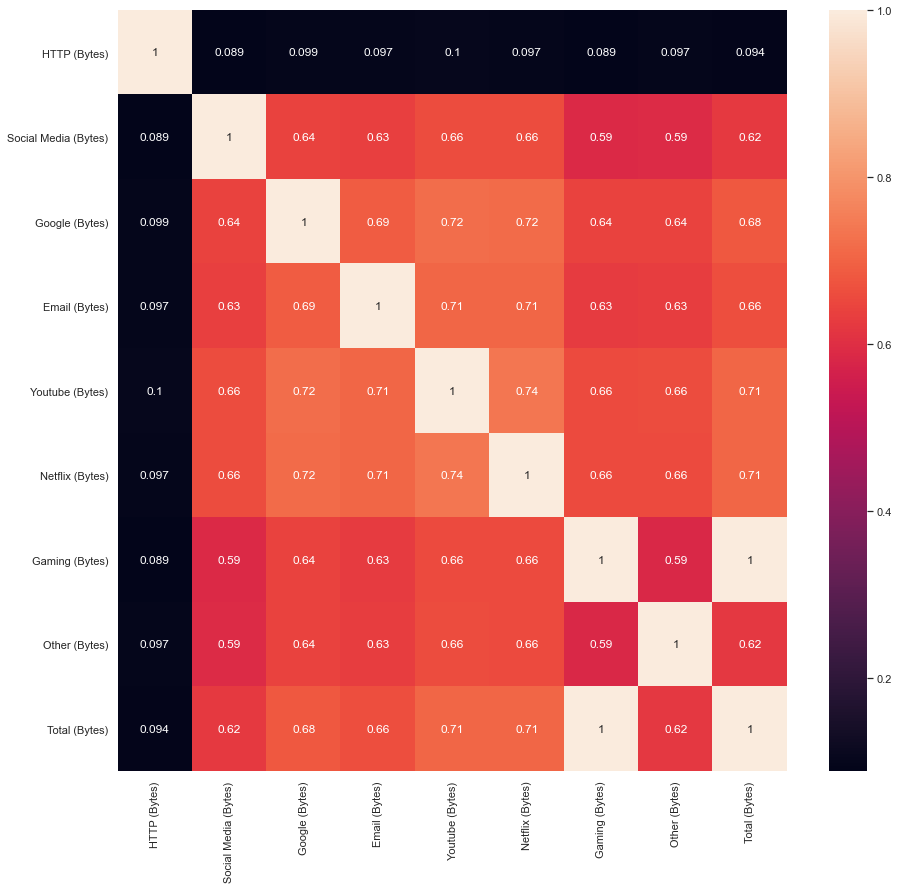

In [46]:
#correlation analyss
data_corr = data_clean.iloc[:,3:]
correlation_matrix=data_corr.corr()
sns.heatmap(correlation_matrix, annot=True)
sns.set(rc={'figure.figsize':(12,7)})
plt.show()